In [1]:
import pandas as pd
from darts import TimeSeries



df = pd.read_csv("MY3_May_2023_KNN_Imputed.csv")


df1 = df
df1['Datetime'] = pd.to_datetime(df['Datetime'])

df1 = df.set_index('Datetime')
#df1
df2=df1.resample('1H').mean()
df2.reset_index(inplace = True)
df2.head()



df = df2

target1 = 'field1'
test_l = 168
train_l = len(df) - test_l
date = 'Datetime'
# Create a TimeSeries, specifying the time and value columns
series1 = TimeSeries.from_dataframe(df, date, target1)

# Set aside the last 24 hours as a validation series
train1, val1 = series1[:train_l], series1[train_l:]

target2 = 'field2'
test_l = 168
train_l = len(df) - test_l

# Create a TimeSeries, specifying the time and value columns
series2 = TimeSeries.from_dataframe(df, date, target2)

# Set aside the last 24 hours as a validation series
train2, val2 = series2[:train_l], series2[train_l:]

target3 = 'field3'
test_l = 168
train_l = len(df) - test_l

# Create a TimeSeries, specifying the time and value columns
series3 = TimeSeries.from_dataframe(df, date, target3)

# Set aside the last 24 hours as a validation series
train3, val3 = series3[:train_l], series3[train_l:]

target4 = 'field4'
test_l = 168
train_l = len(df) - test_l

# Create a TimeSeries, specifying the time and value columns
series4 = TimeSeries.from_dataframe(df, date, target4)

# Set aside the last 24 hours as a validation series
train4, val4 = series4[:train_l], series4[train_l:]

target7 = 'field7'
test_l = 168
train_l = len(df) - test_l

# Create a TimeSeries, specifying the time and value columns
series7 = TimeSeries.from_dataframe(df, date, target7)

# Set aside the last 24 hours as a validation series
train7, val7 = series7[:train_l], series7[train_l:]

target8 = 'field8'
test_l = 168
train_l = len(df) - test_l

# Create a TimeSeries, specifying the time and value columns
series8 = TimeSeries.from_dataframe(df, date, target8)

# Set aside the last 24 hours as a validation series
train8, val8 = series8[:train_l], series8[train_l:]






## BATS MODEL

In [2]:
from darts.models import BATS

# Create a BATS model for target1
model1 = BATS()

# Train the model
model1.fit(train1)

# Test the model
prediction1 = model1.predict(len(val1))

# Make predictions
forecast1 = model1.predict(n=test_l)

# Print the predicted values
print(forecast1.pd_series())


# Repeat the above steps for other target series

# Create a BATS model for target2
model2 = BATS()

# Train the model
model2.fit(train2)

# Test the model
prediction2 = model2.predict(len(val2))

# Make predictions
forecast2 = model2.predict(n=test_l)

# Print the predicted values
print(forecast2.pd_series())


# Repeat the above steps for other target series

# Create a BATS model for target3
model3 = BATS()

# Train the model
model3.fit(train3)

# Test the model
prediction3 = model3.predict(len(val3))

# Make predictions
forecast3 = model3.predict(n=test_l)

# Print the predicted values
print(forecast3.pd_series())

# Repeat the above steps for other target series

# Create a BATS model for target4
model4 = BATS()

# Train the model
model4.fit(train4)

# Test the model
prediction4 = model4.predict(len(val4))

# Make predictions
forecast4 = model4.predict(n=test_l)

# Print the predicted values
print(forecast4.pd_series())

# Repeat the above steps for other target series

# Create a BATS model for target7
model7 = BATS()

# Train the model
model7.fit(train7)

# Test the model
prediction7 = model7.predict(len(val7))

# Make predictions
forecast7 = model7.predict(n=test_l)

# Print the predicted values
print(forecast7.pd_series())

# Repeat the above steps for other target series

# Create a BATS model for target8
model8 = BATS()

# Train the model
model8.fit(train8)

# Test the model
prediction8 = model8.predict(len(val8))

# Make predictions
forecast8 = model8.predict(n=test_l)

# Print the predicted values
print(forecast8.pd_series())


Datetime
2023-04-15 01:00:00    238.273931
2023-04-15 02:00:00    238.111697
2023-04-15 03:00:00    238.013339
2023-04-15 04:00:00    237.936963
2023-04-15 05:00:00    237.869872
                          ...    
2023-04-21 20:00:00    237.469620
2023-04-21 21:00:00    237.469620
2023-04-21 22:00:00    237.469620
2023-04-21 23:00:00    237.469620
2023-04-22 00:00:00    237.469620
Freq: H, Length: 168, dtype: float64
Datetime
2023-04-15 01:00:00    132.691616
2023-04-15 02:00:00    132.530600
2023-04-15 03:00:00    132.486111
2023-04-15 04:00:00    132.418601
2023-04-15 05:00:00    132.358404
                          ...    
2023-04-21 20:00:00    131.986125
2023-04-21 21:00:00    131.986125
2023-04-21 22:00:00    131.986125
2023-04-21 23:00:00    131.986125
2023-04-22 00:00:00    131.986125
Freq: H, Length: 168, dtype: float64
Datetime
2023-04-15 01:00:00    949.898919
2023-04-15 02:00:00    919.984588
2023-04-15 03:00:00    896.053123
2023-04-15 04:00:00    876.907952
2023-04-15 05:0

In [3]:
import pandas as pd
from darts.metrics import rmse, mae

# Create a DataFrame to store the results
results_df = pd.DataFrame(columns=['Field', 'RMSE', 'MAE'])

# Function to calculate RMSE and MAE and append the results to the DataFrame
def calculate_metrics(field_name, model, validation_series):
    forecast = model.predict(len(validation_series))
    rmse_score = rmse(validation_series, forecast)
    mae_score = mae(validation_series, forecast)
    results_df.loc[len(results_df)] = [field_name, rmse_score, mae_score]

# Calculate metrics for each field
calculate_metrics('field1', model1, val1)
calculate_metrics('field2', model2, val2)
calculate_metrics('field3', model3, val3)
calculate_metrics('field4', model4, val4)
calculate_metrics('field7', model7, val7)
calculate_metrics('field8', model8, val8)

# Save the results to a CSV file
results_df.to_csv('bats_errors.csv', index=False)


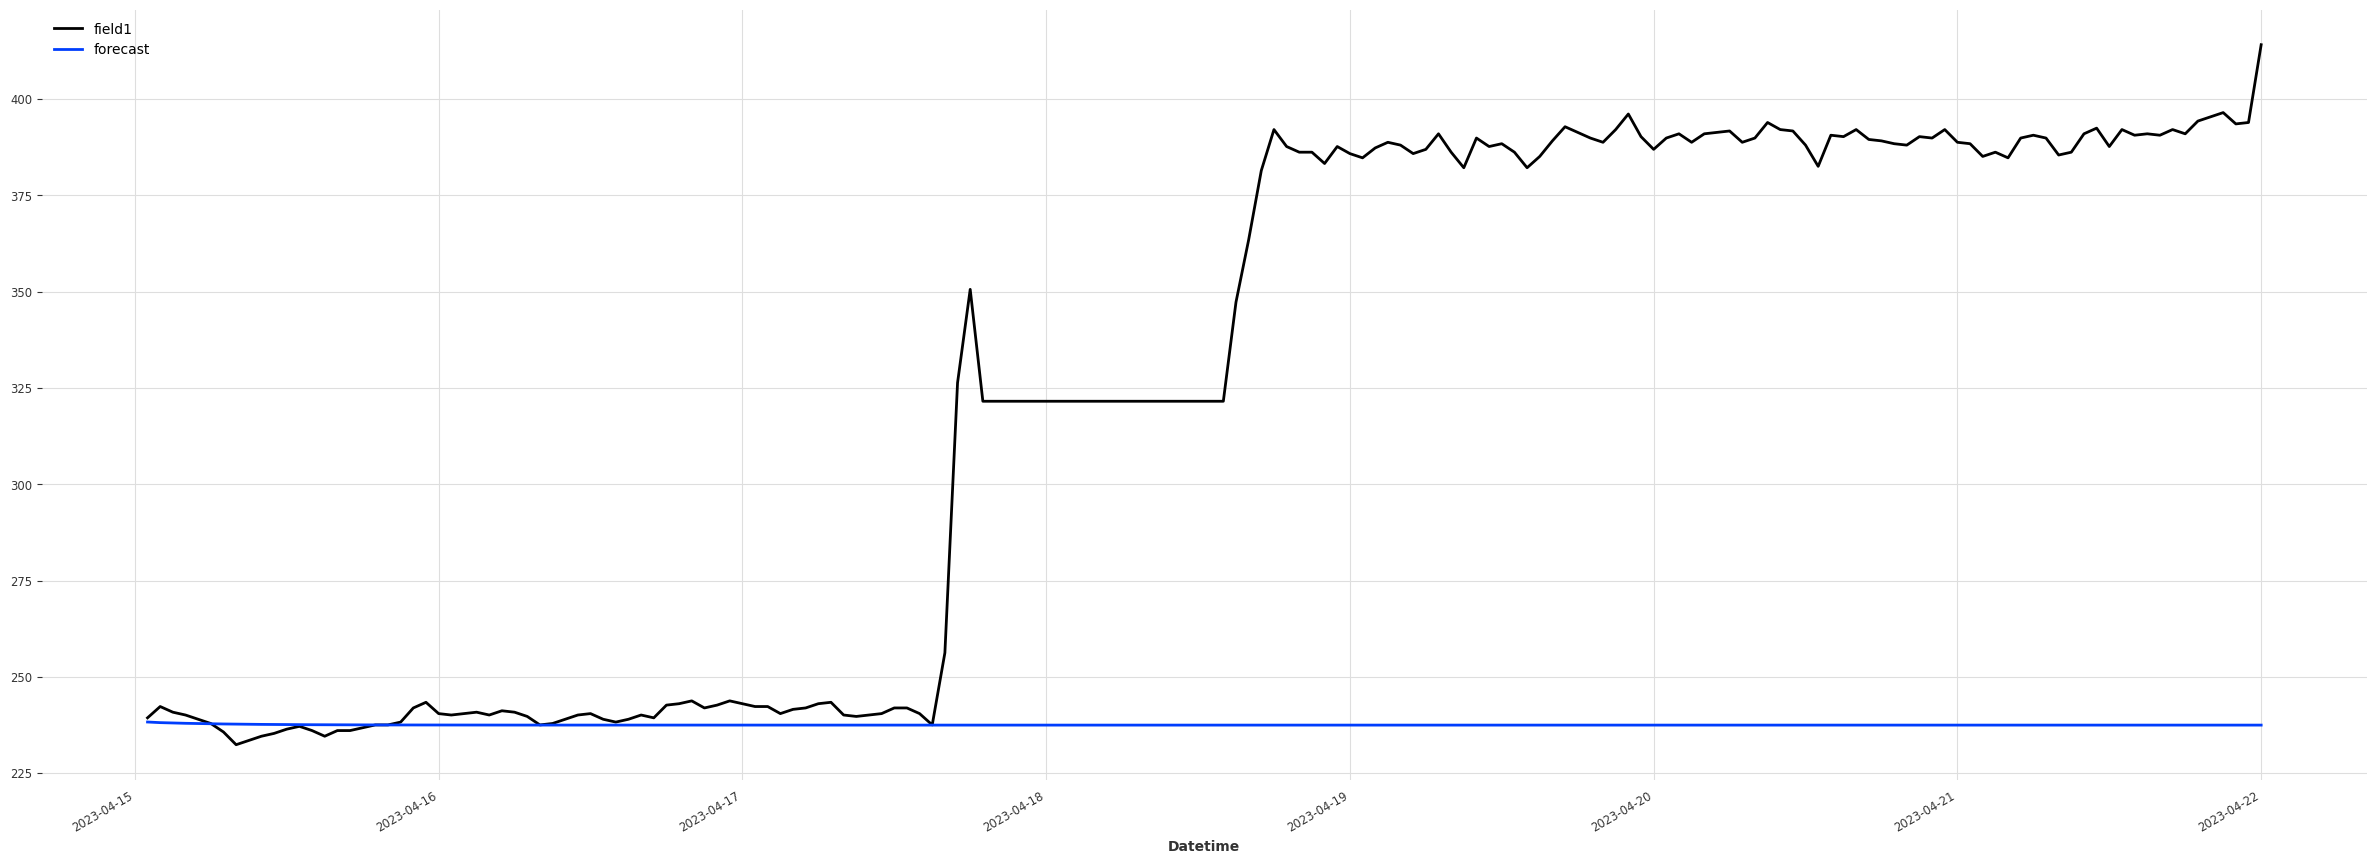

In [4]:
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [30, 10]
val1.plot()
prediction1.plot(label="forecast", low_quantile=0.05, high_quantile=0.95)
plt.legend()
plt.show()

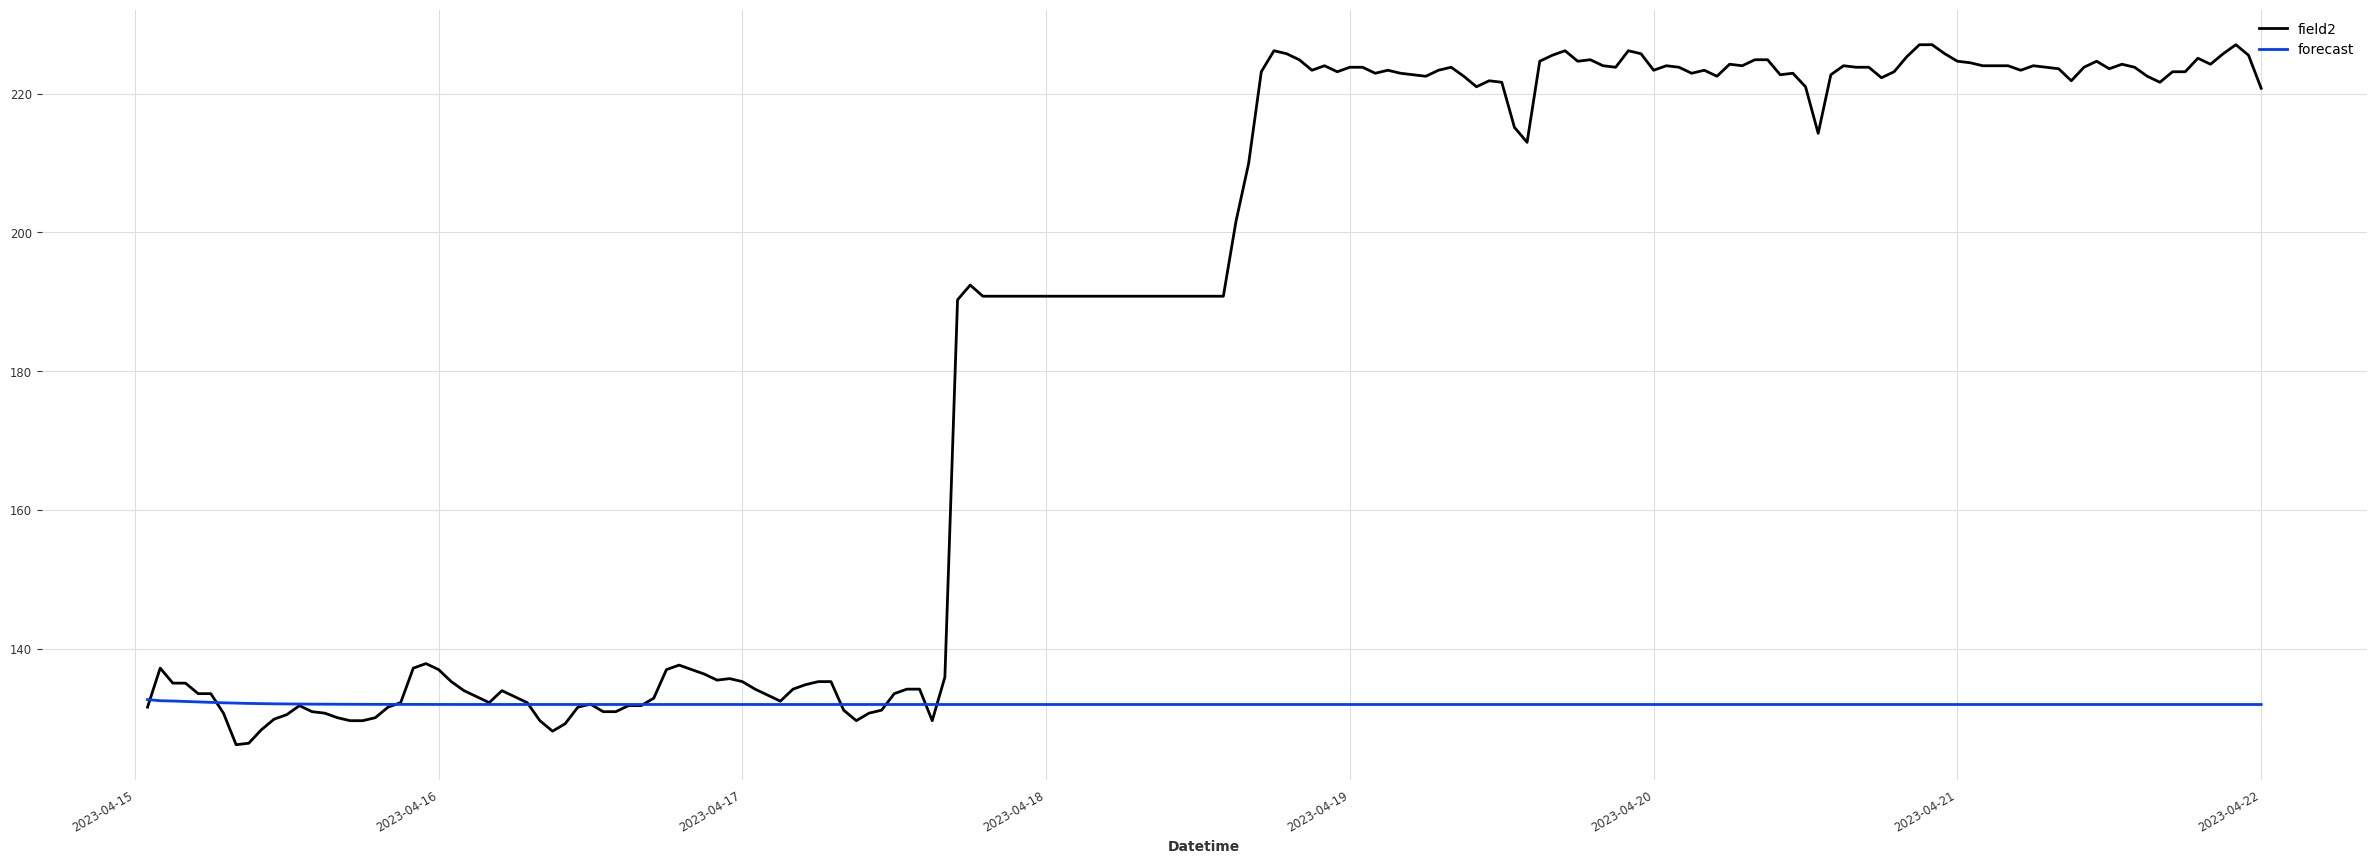

In [5]:
plt.rcParams['figure.figsize'] = [30, 10]
val2.plot()
prediction2.plot(label="forecast", low_quantile=0.05, high_quantile=0.95)
plt.legend()
plt.show()

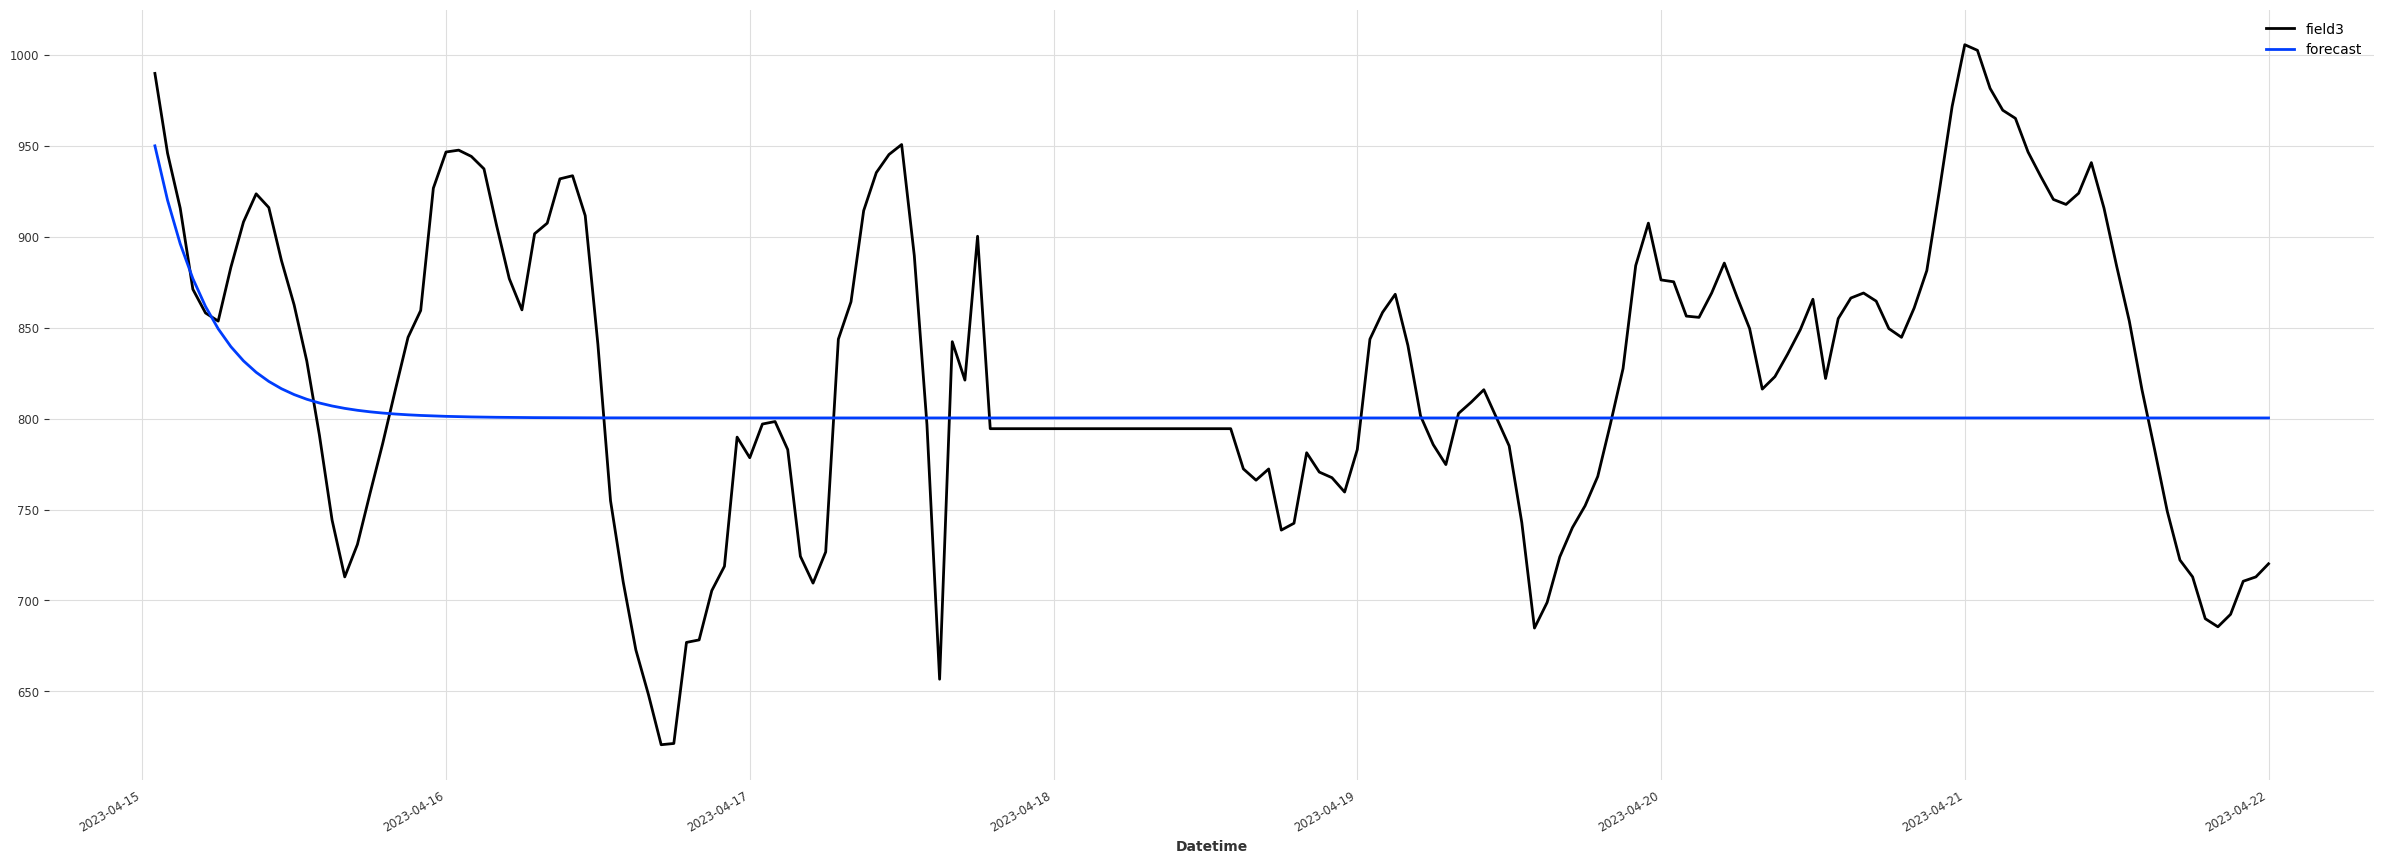

In [6]:
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [30, 10]
val3.plot()
prediction3.plot(label="forecast", low_quantile=0.05, high_quantile=0.95)
plt.legend()
plt.show()

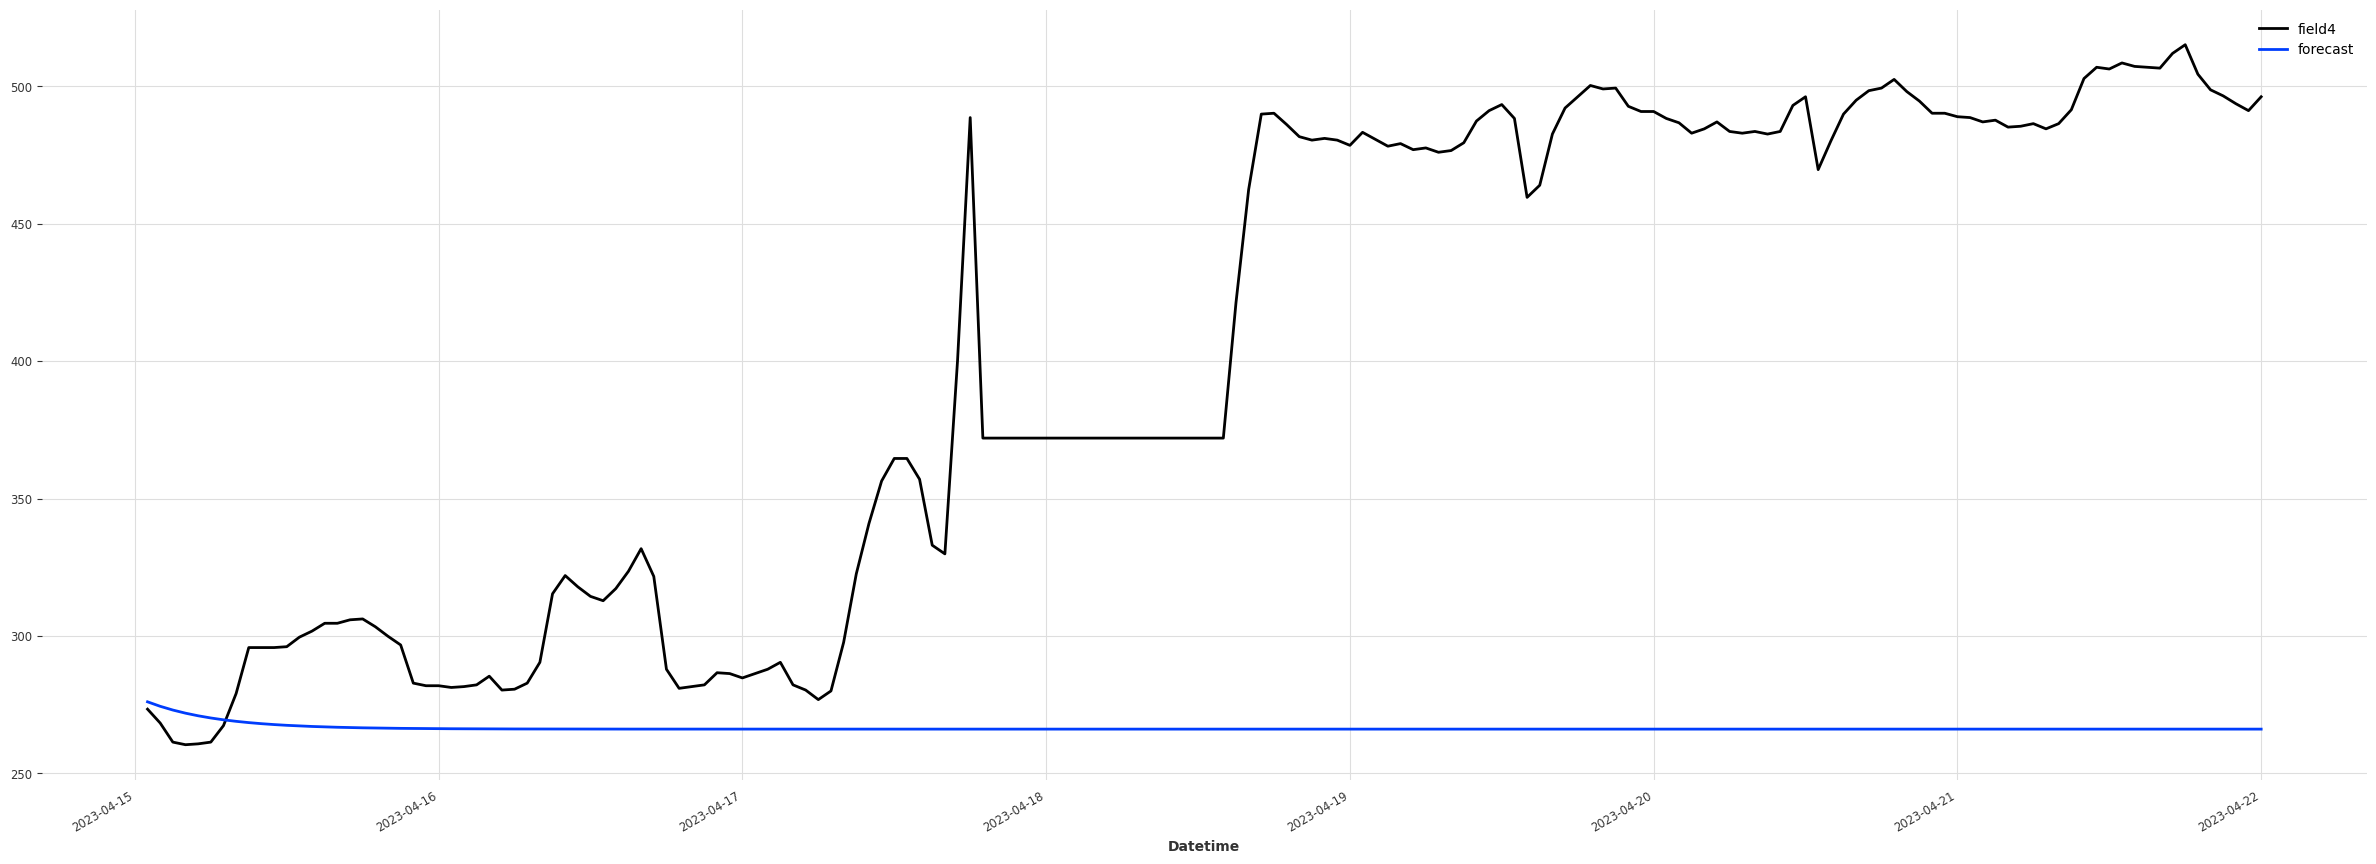

In [7]:
plt.rcParams['figure.figsize'] = [30, 10]
val4.plot()
prediction4.plot(label="forecast", low_quantile=0.05, high_quantile=0.95)
plt.legend()
plt.show()

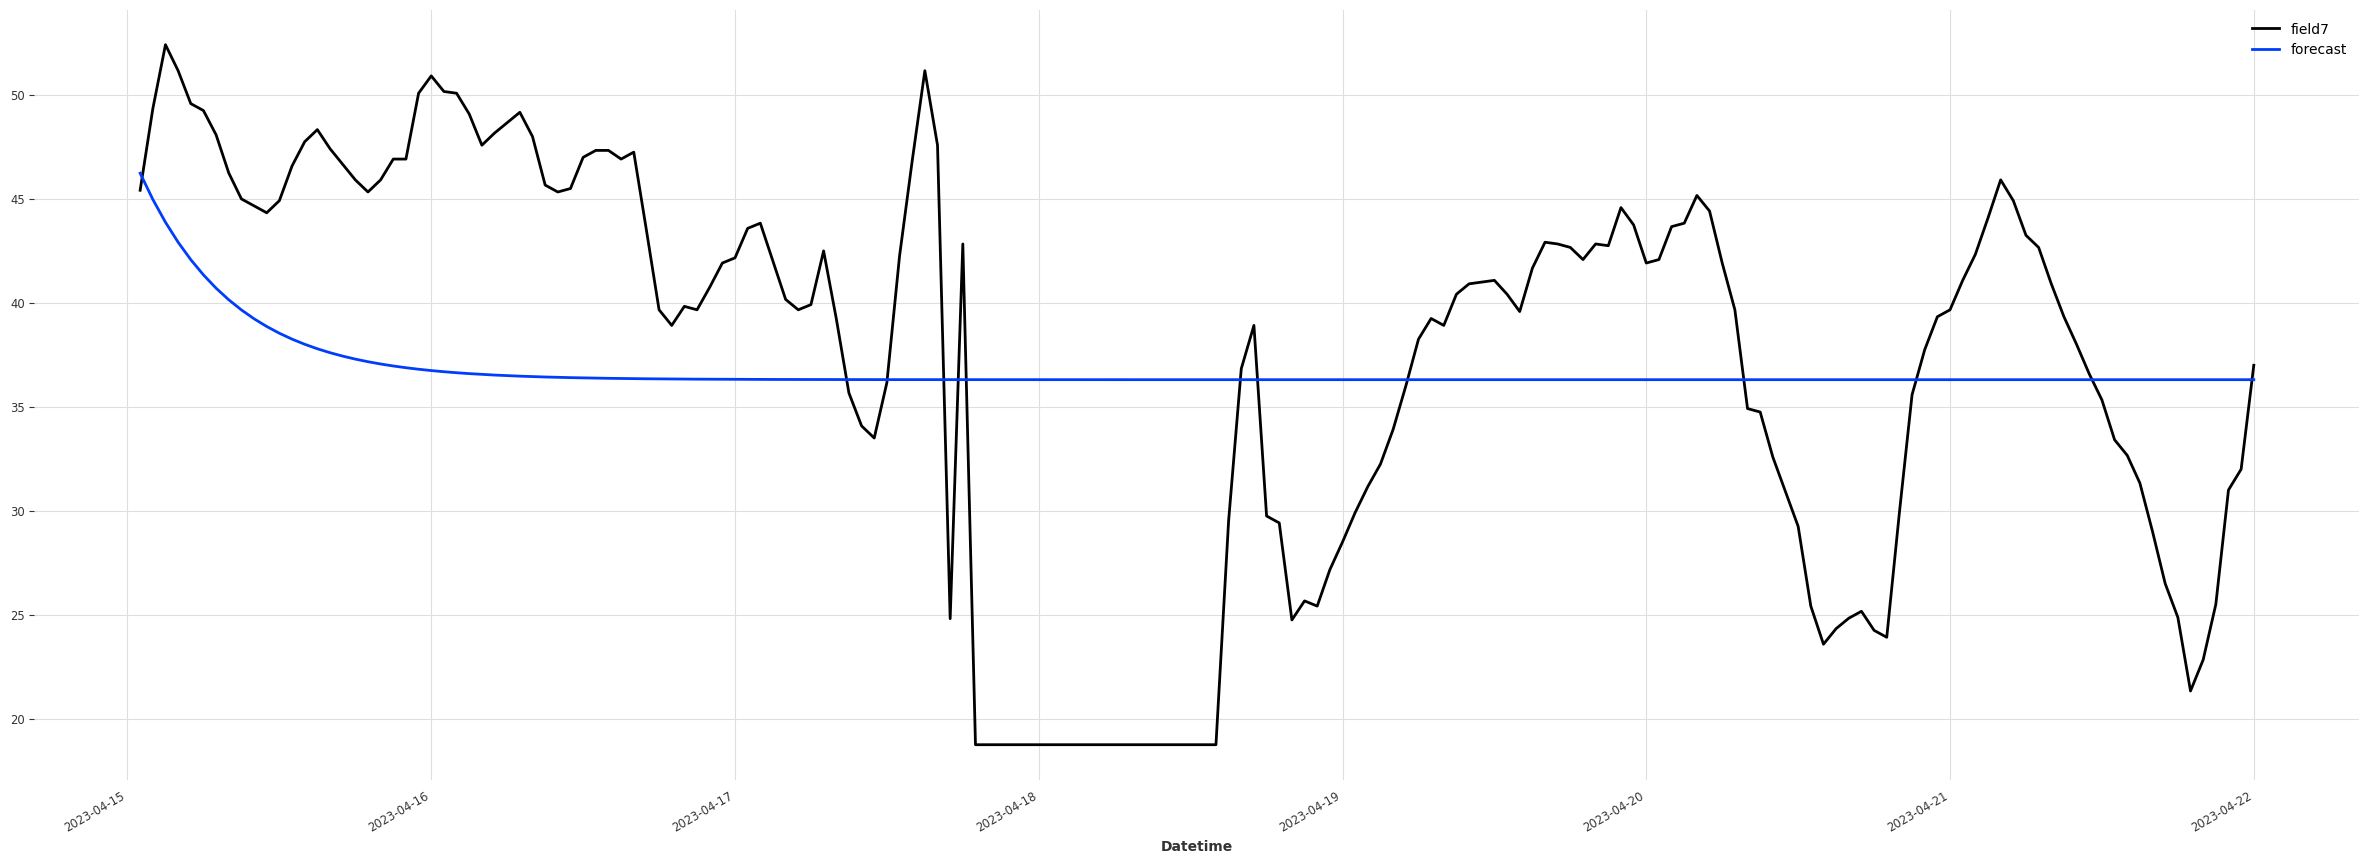

In [8]:
plt.rcParams['figure.figsize'] = [30, 10]
val7.plot()
prediction7.plot(label="forecast", low_quantile=0.05, high_quantile=0.95)
plt.legend()
plt.show()

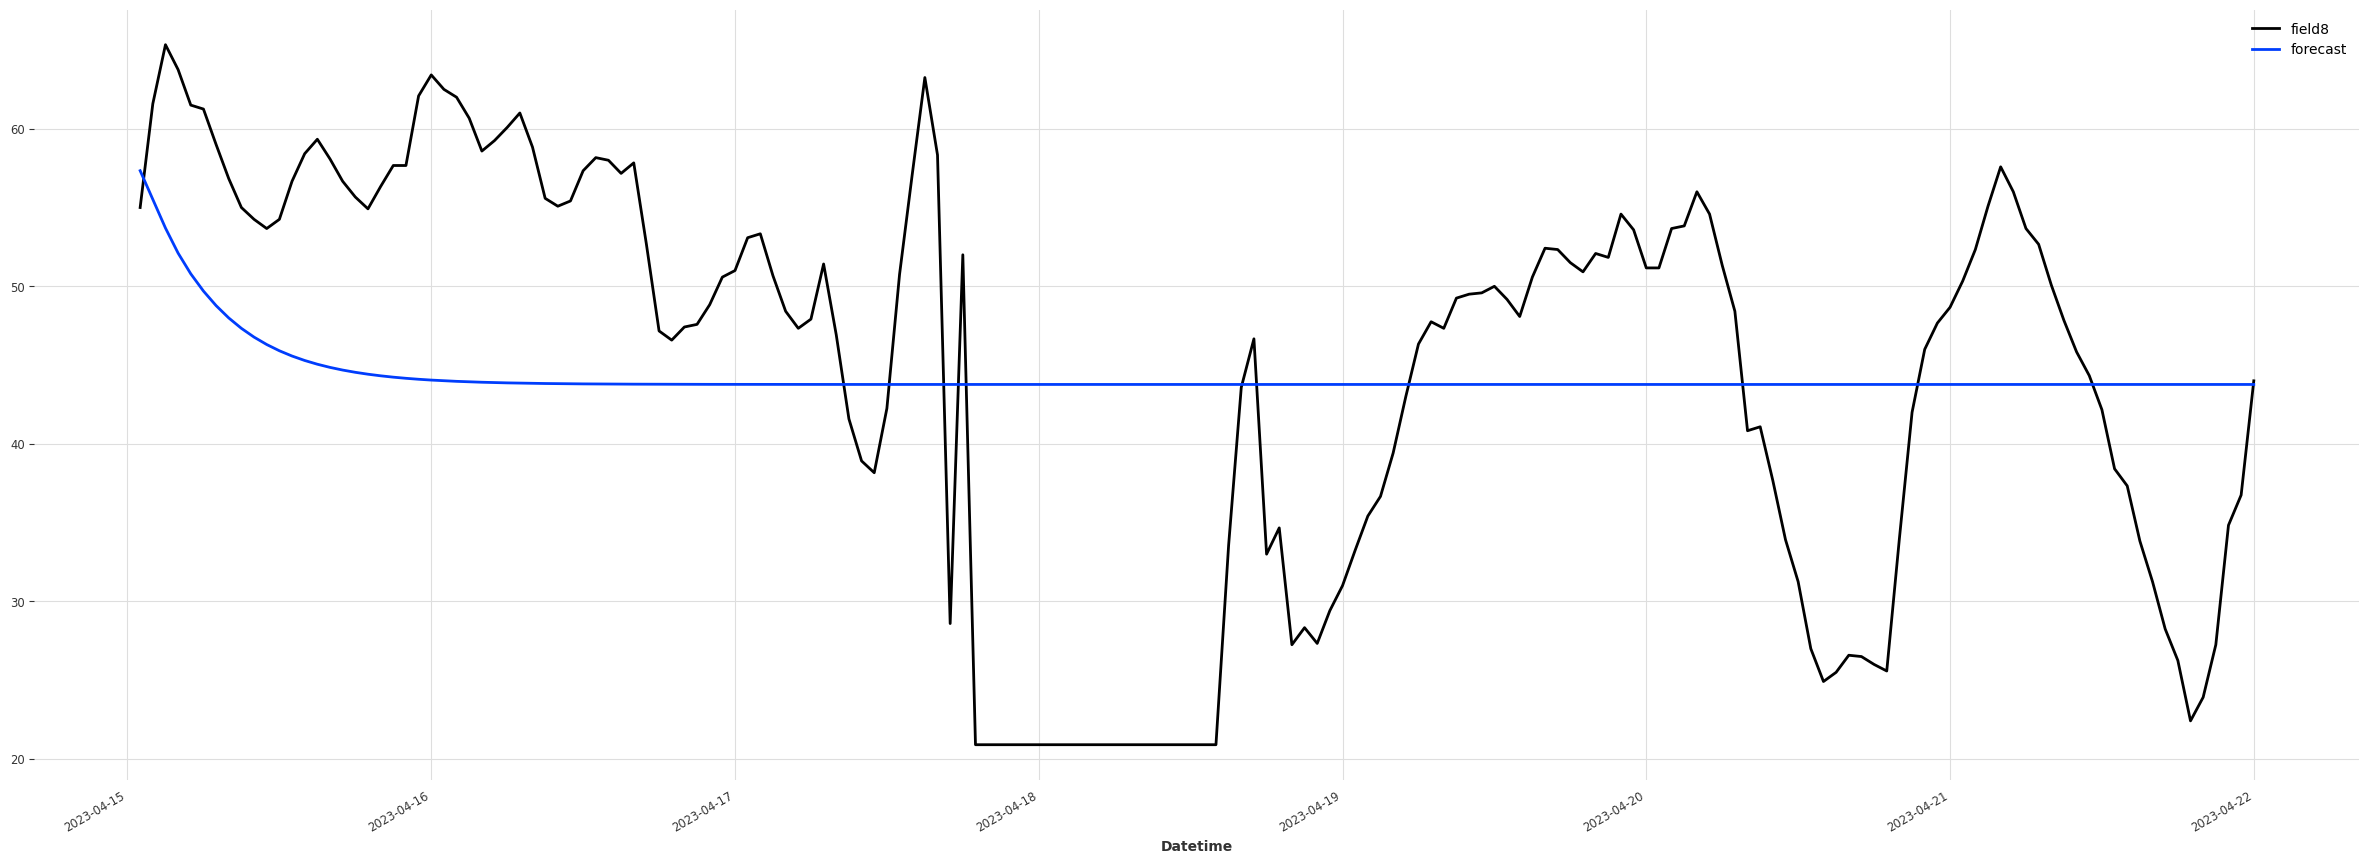

In [9]:
plt.rcParams['figure.figsize'] = [30, 10]
val8.plot()
prediction8.plot(label="forecast", low_quantile=0.05, high_quantile=0.95)
plt.legend()
plt.show()

## TBATS model

In [10]:
#


from darts.models import TBATS

# Create a TBATS model for target1
model1 = TBATS()

# Train the model
model1.fit(train1)

# Test the model
prediction1 = model1.predict(len(val1))

# Make predictions
forecast1 = model1.predict(n=test_l)

# Print the predicted values
print(forecast1.pd_series())


# Repeat the above steps for other target series

# Create a TBATS model for target2
model2 = TBATS()

# Train the model
model2.fit(train2)

# Test the model
prediction2 = model2.predict(len(val2))

# Make predictions
forecast2 = model2.predict(n=test_l)

# Print the predicted values
print(forecast2.pd_series())


# Repeat the above steps for other target series

# Create a TBATS model for target3
model3 = TBATS()

# Train the model
model3.fit(train3)

# Test the model
prediction3 = model3.predict(len(val3))

# Make predictions
forecast3 = model3.predict(n=test_l)

# Print the predicted values
print(forecast3.pd_series())

# Repeat the above steps for other target series

# Create a TBATS model for target4
model4 = TBATS()

# Train the model
model4.fit(train4)

# Test the model
prediction4 = model4.predict(len(val4))

# Make predictions
forecast4 = model4.predict(n=test_l)

# Print the predicted values
print(forecast4.pd_series())

# Repeat the above steps for other target series

# Create a TBATS model for target7
model7 = TBATS()

# Train the model
model7.fit(train7)

# Test the model
prediction7 = model7.predict(len(val7))

# Make predictions
forecast7 = model7.predict(n=test_l)

# Print the predicted values
print(forecast7.pd_series())

# Repeat the above steps for other target series

# Create a TBATS model for target8
model8 = TBATS()

# Train the model
model8.fit(train8)

# Test the model
prediction8 = model8.predict(len(val8))

# Make predictions
forecast8 = model8.predict(n=test_l)

# Print the predicted values
print(forecast8.pd_series())


Datetime
2023-04-15 01:00:00    236.476452
2023-04-15 02:00:00    232.652732
2023-04-15 03:00:00    228.815860
2023-04-15 04:00:00    224.974433
2023-04-15 05:00:00    222.717060
                          ...    
2023-04-21 20:00:00    237.769424
2023-04-21 21:00:00    240.400595
2023-04-21 22:00:00    242.421002
2023-04-21 23:00:00    243.132151
2023-04-22 00:00:00    242.131534
Freq: H, Length: 168, dtype: float64
Datetime
2023-04-15 01:00:00    131.147388
2023-04-15 02:00:00    128.660908
2023-04-15 03:00:00    126.312503
2023-04-15 04:00:00    124.311200
2023-04-15 05:00:00    123.273079
                          ...    
2023-04-21 20:00:00    132.035087
2023-04-21 21:00:00    132.765861
2023-04-21 22:00:00    133.300287
2023-04-21 23:00:00    133.247612
2023-04-22 00:00:00    132.375209
Freq: H, Length: 168, dtype: float64
Datetime
2023-04-15 01:00:00    958.303414
2023-04-15 02:00:00    929.225560
2023-04-15 03:00:00    897.501494
2023-04-15 04:00:00    867.201765
2023-04-15 05:0

In [11]:
import pandas as pd
from darts.metrics import rmse, mae

# Create a DataFrame to store the results
results_df = pd.DataFrame(columns=['Field', 'RMSE', 'MAE'])

# Function to calculate RMSE and MAE and append the results to the DataFrame
def calculate_metrics(field_name, model, validation_series):
    forecast = model.predict(len(validation_series))
    rmse_score = rmse(validation_series, forecast)
    mae_score = mae(validation_series, forecast)
    results_df.loc[len(results_df)] = [field_name, rmse_score, mae_score]

# Calculate metrics for each field
calculate_metrics('field1', model1, val1)
calculate_metrics('field2', model2, val2)
calculate_metrics('field3', model3, val3)
calculate_metrics('field4', model4, val4)
calculate_metrics('field7', model7, val7)
calculate_metrics('field8', model8, val8)

# Save the results to a CSV file
results_df.to_csv('tbats_errors.csv', index=False)


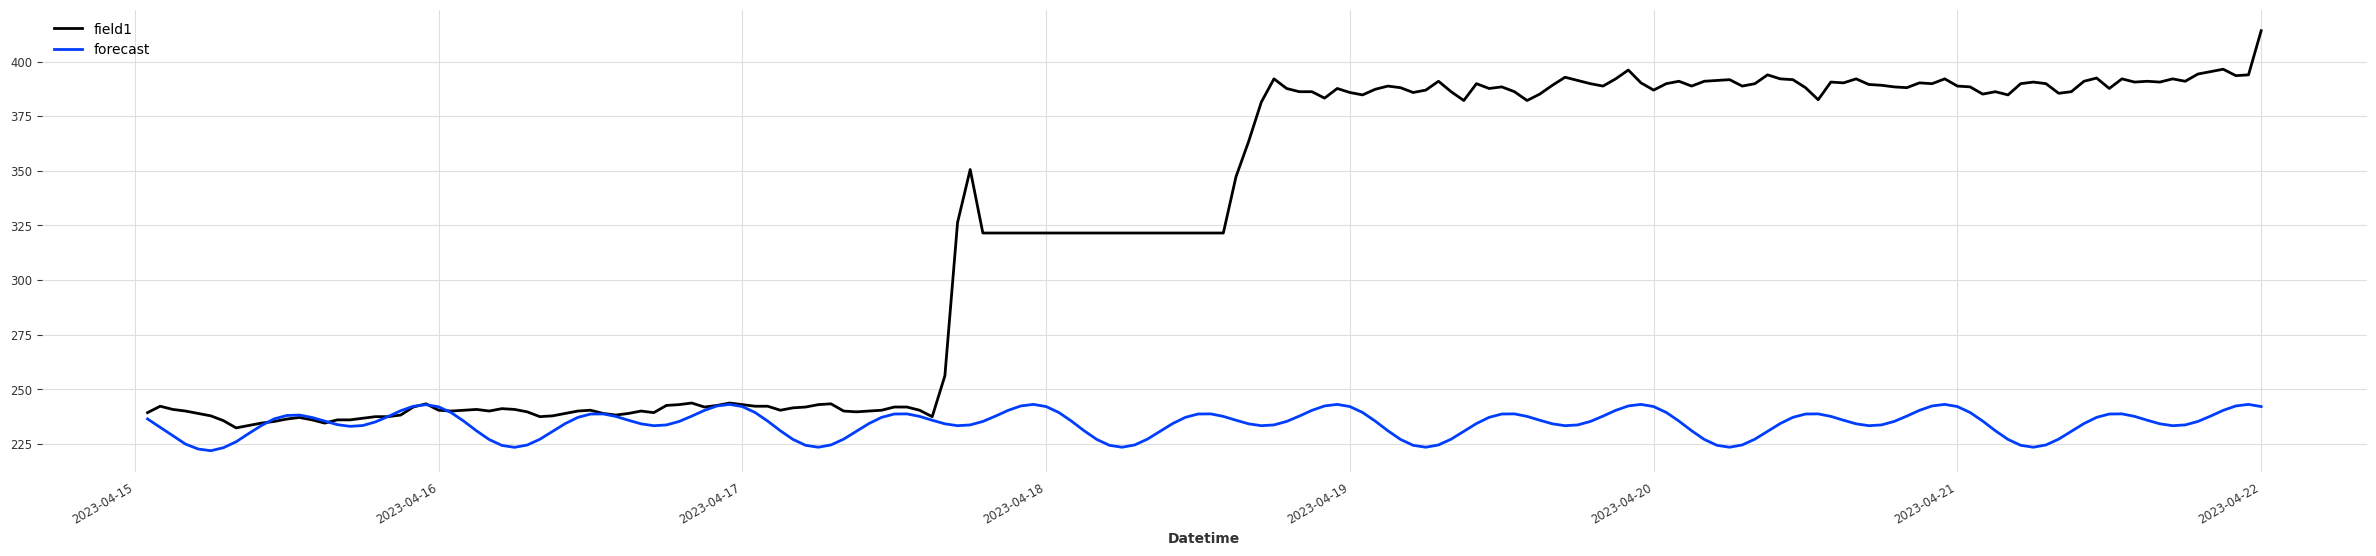

In [12]:
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [30, 6]
val1.plot()
prediction1.plot(label="forecast", low_quantile=0.05, high_quantile=0.95)
plt.legend()
plt.show()

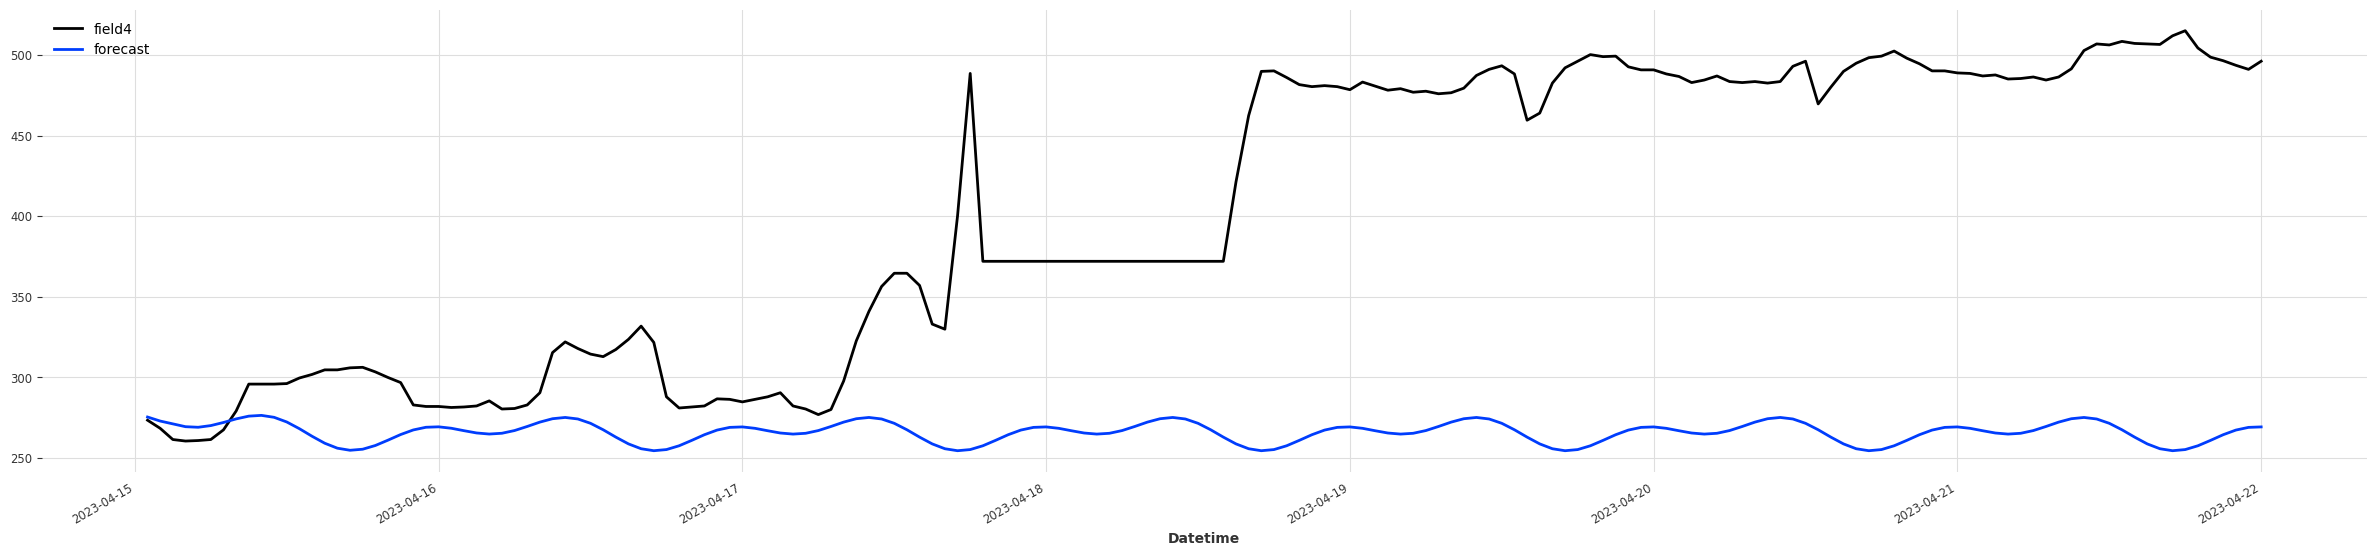

In [13]:
plt.rcParams['figure.figsize'] = [30, 6]
val4.plot()
prediction4.plot(label="forecast", low_quantile=0.05, high_quantile=0.95)
plt.legend()
plt.show()

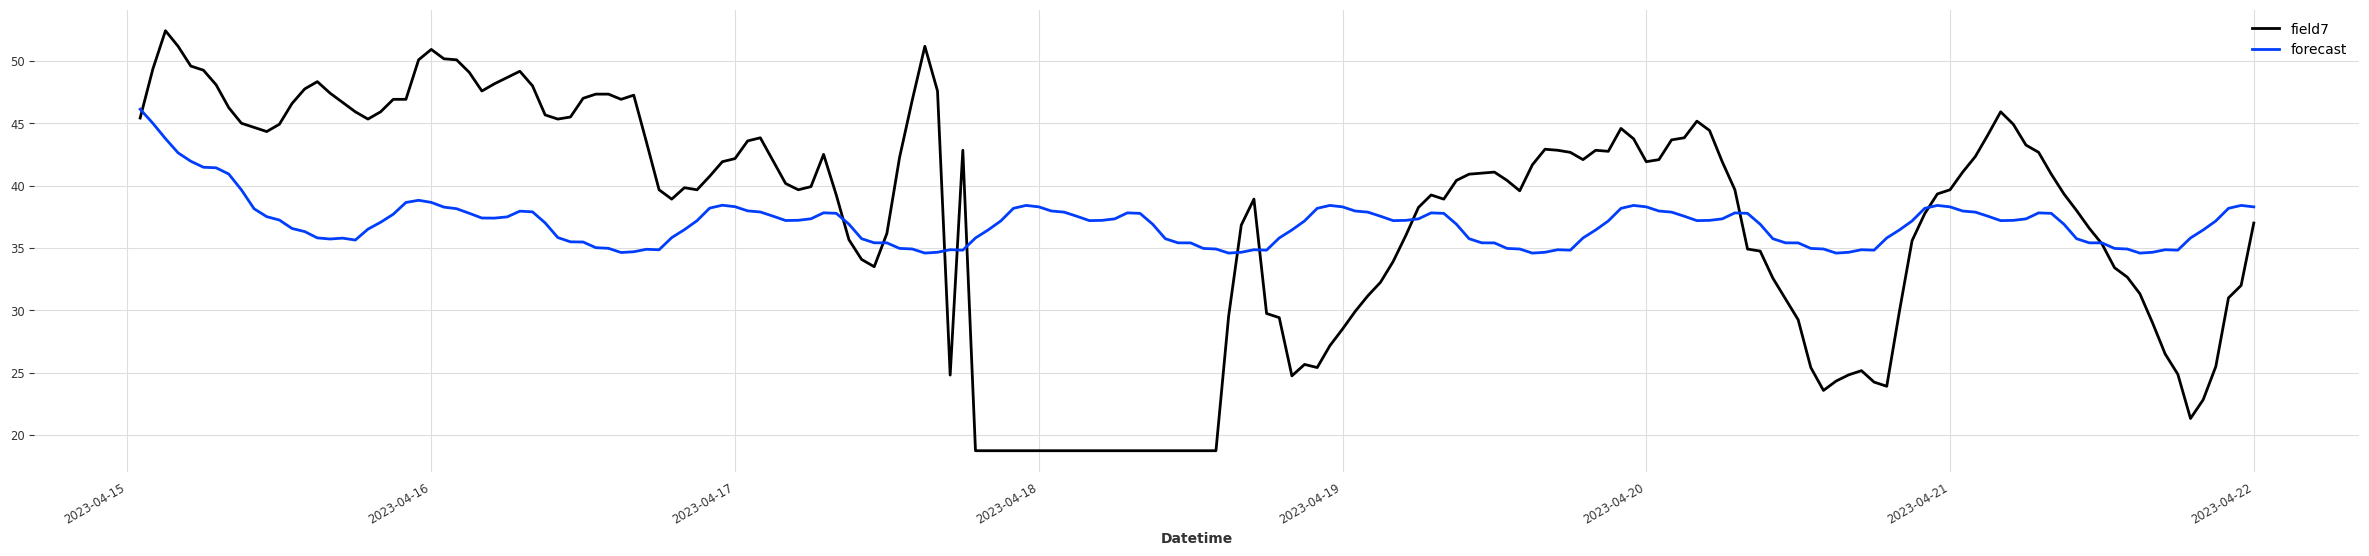

In [14]:
plt.rcParams['figure.figsize'] = [30, 6]
val7.plot()
prediction7.plot(label="forecast", low_quantile=0.05, high_quantile=0.95)
plt.legend()
plt.show()

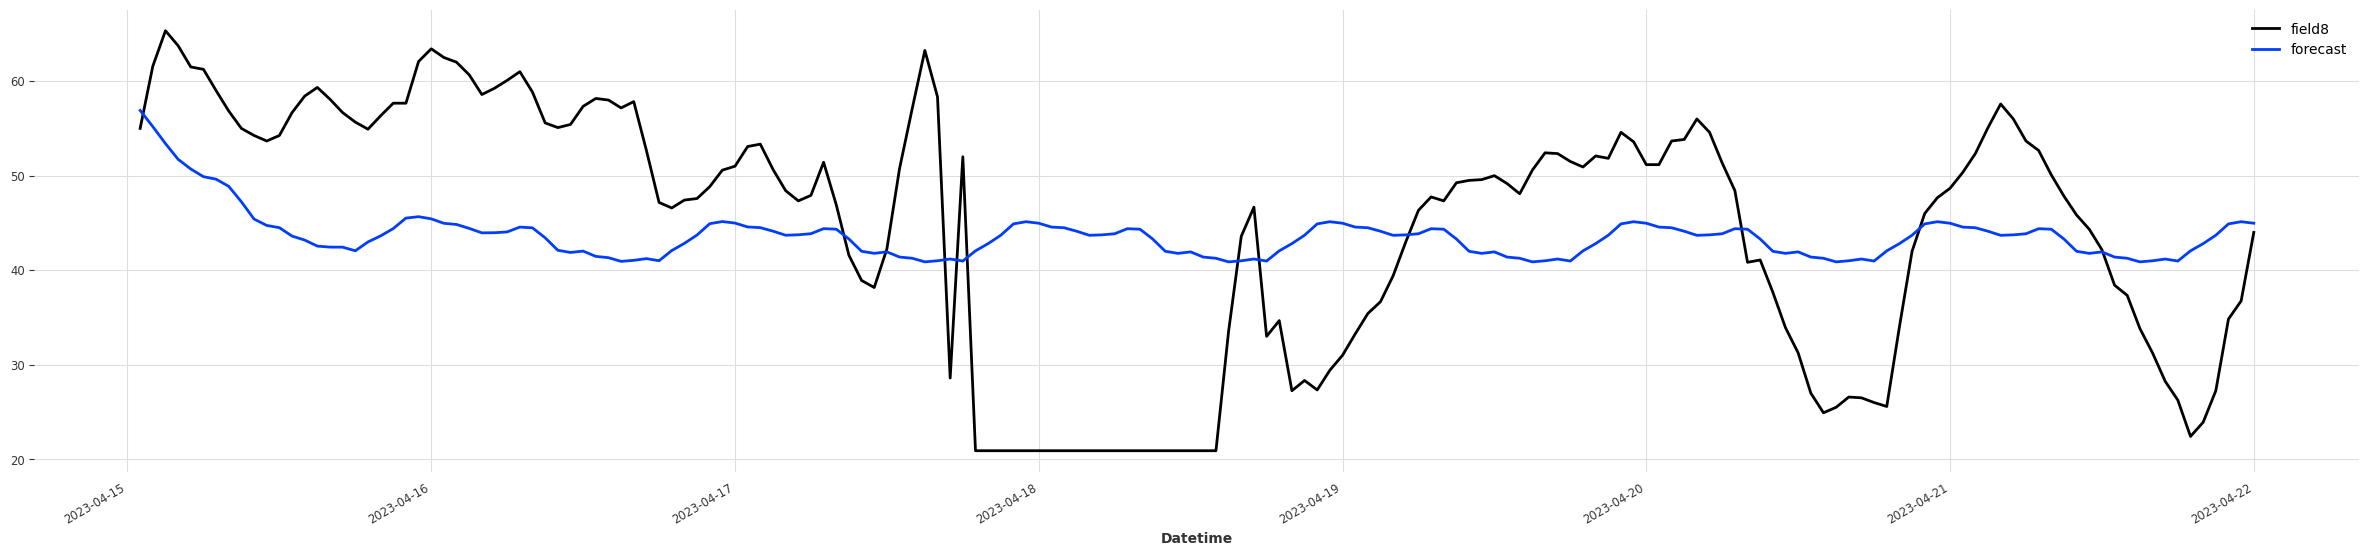

In [15]:
plt.rcParams['figure.figsize'] = [30, 6]
val8.plot()
prediction8.plot(label="forecast", low_quantile=0.05, high_quantile=0.95)
plt.legend()
plt.show()